### Diff-in-diff type study

$$y_{st} = \alpha + \beta_1\text{market prep}_{st} + \beta_2 \text{market creation}_{st} + \beta_3\text{market prep}_{st}\times\text{market creation}_{st} + X_{st} + \gamma_s + \mu_t + \varepsilon_{st} $$

where I define market preparation and market creation policies as below

### Event-study

Our empirical approach begins with an event-study style equation:

$$y_{st} = \alpha + \sum_{\tau = -T}^{T} \sigma_{\tau} D_{\tau, st} + X_{st} + \gamma_s + \mu_t + \varepsilon_{st} $$

where $y_{st}$ is an outcome of interest in state $s$ in year $t$.  We include state fixed effects $\gamma_s$ to control for any permanent, unobserved differences across states.  Year fixed effects, $\mu_t$, non-parametericaly control for national trends in the outcome of interest. 

The variables $D_{\tau,st}$ are separate indicators for each year $\tau$ relative to the passage of a market preparation, market creation, or market expansion policy.  The three policies I measure are summarised in the table

| Policy Group | Definition | Barriers addressed | Measurement |
| :----------: | :---------- |:---------- | :------ |
|Market Preparation| Ensure that market players can, technically and legally, use the technology to its fullest extent (Doris 2012) | Institutional barriers, market access | $D_{st} = 1$ for the first IPP-owned solar project with capacity (> 1 MW, 5 MW, 10 MW) is installed in state $s$  |
| Market Creation |Indicate to developers and investors that there is a long-term public commitment to the market by creating demand and therefore increasing confidence for private sector investment (Doris and Krasko 2012) |  Investor uncertainty, lack of existing markets, public understanding | $D_{st} = 1$ if first compliance year for solar carve-out; or general RPS |
| Market Expansion| Use incentives to target the development of niche markets that are of particular long-term public good | Technology first cost, investment uncertainty | $D_{st} = 1$ in year that large-scale performance-based incentive introduced. | 


For state sthat never adopt a policy in any category, all $D_{\tau,st}$ are set equal to zero.

As non-adopters, they do not play a role int eh estimation of the $\sigma_{\tau}$'s but they aid in the estimation of the year fixed effects $\mu_t$ as well as the constant $\alpha$.  

The $\sigma_{\tau}$'s are the apramters of interest as they report the annual mean of the outcome variable in event time, after adjusting for state and year fixed effects and the set of controls.


$X_{st}$ includes time-varying indicators for the 
- presence of energy efficiency standards
- restructuring
- net metering
- green power purchasing
- public benefits funds
- NO x trading programs
- control variable measuring intensity of CAA 


I present event-study figures that plot the estimated $\sigma_{\tau}$'s against $\tau$.  These figures provide an opportunity to visually assess whether there are differential trends in the outcome variables prior to RPS passages, which helps to assess the validity of the difference-in-differences identification strategy.  The event-study figures alos demonstrate whether any impact on the outcome emerges immediately or over time, which will inform the choice of specification to summarize the average effect of these policies.

In [294]:
**********************************************
****
**** OPENING DATA FOR Rachel Anderson
****
**********************************************
set more off
clear all
macro drop _all
clear matrix
drop _all 
cap log close
estimates clear

import delimited "/Users/rachelanderson/Dropbox (Princeton)/Research_V2/descriptive_solar/code/analysis/stata-policy-analysis/event_study/event-study-sample.csv"

**********************************************
****
**** Encode group identifiers
****
**********************************************

egen state_code = group(state)
egen region_code = group(region)

**********************************************
****
**** Outcomes
****
**********************************************


// Create log outcome variables
gen log_n_plants = log(n_plants+1)
gen log_ac_cap = log(ac_cap_added + 1)

gen log_n_plants_qf = log(n_plants_qf + 1)
gen log_ac_cap_qf = log(ac_cap_added_qf + 1)

gen log_cum_ac_cap = log(cum_ac_cap_added + 1)
gen log_cum_n_plants = log(cum_n_plants + 1)

gen cum_avg_cap = cum_ac_cap_added/cum_n_plants
replace cum_avg_cap = 0 if cum_avg_cap == .
replace avg_cap_ac = 0 if avg_cap_ac == .

gen log_cum_avg_plant = log(cum_avg_cap + 1)
label variable log_cum_avg_plant "Log Avg. Size"

label variable log_cum_ac_cap "Log Total Capacity"
label variable log_ac_cap "Log Capacity Additions"

label variable log_n_plants "Log # Plants Added"
label variable log_cum_n_plants "Log Total # Plants"

label variable cum_avg_cap "Avg. plant size"
label variable avg_cap_ac "Avg. new plant size"

gen log_avg_cap = log(avg_cap_ac + 1)
label variable log_avg_cap "Log avg. size"

// create capacity per cap
gen dc_per_cap = dc_cap_added/pop_2010
gen log_dc_per_cap = log(dc_per_cap +1)
label variable dc_per_cap "Megawatts per capita"
label varialbe log_dc_per_cap "Log MW per capita"









(57 vars, 750 obs)









(398 missing values generated)

(398 real changes made)

(0 real changes made)














invalid syntax


r(198);
r(198);


In [295]:
**********************************************
****
**** Label policy variables
****
**********************************************

label variable first_plant_yr "First installation"
label variable first_ipp_plant_yr "First IPP installation"

label variable first_carveout_year "First active carve-out"
label variable first_rps_year "First active RPS"

label variable itc_introduced "ITC introduced"
label variable itc_expired "ITC expired"

label variable ptc_introduced "PTC introduced"
label variable ptc_expired "PTC expired"

## Market preparation variable (first utility-scale project)

In [ ]:
capture restore
capture preserve

collapse (sum) first_plant first_plant_pre_sample first_ipp_plant, by(year)
gen plants = sum(first_plant + first_plant_pre_sample)/50
gen ipp_plants = sum(first_ipp_plant)/50
label variable plants "Any solar project > 1 MW"
label variable ipp_plants "IPP-owned solar project"

twoway line plants year || line ipp_plants year, title("% of states with utility-scale solar installations")

restore

## Market creation variable

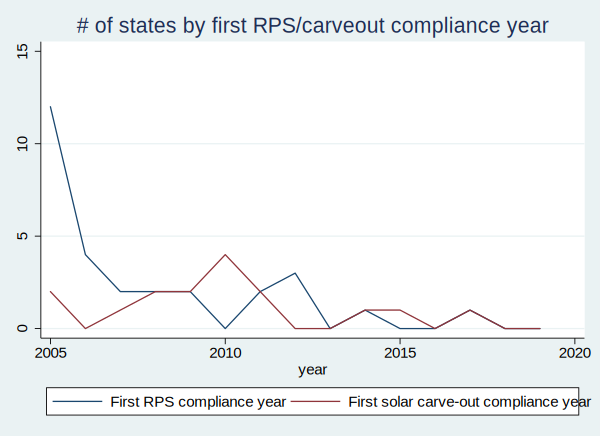

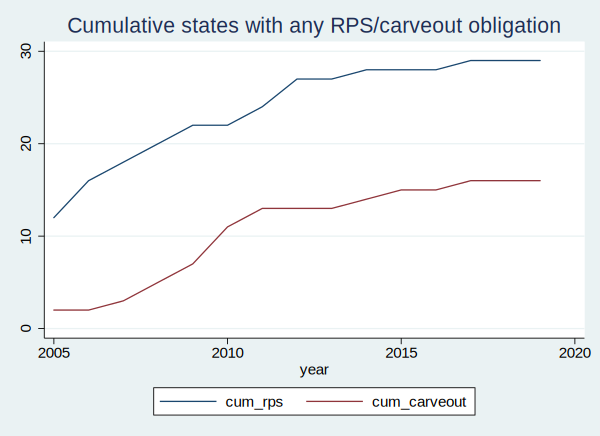

In [293]:
capture restore
capture preserve

collapse (sum) first_rps first_rps_pre_sample first_carveout first_carveout_pre_sample, by(year)
gen rps = first_rps + first_rps_pre_sample
gen cum_rps = sum(first_rps + first_rps_pre_sample)
gen carveout = first_carveout + first_carveout_pre_sample
gen cum_carveout = sum(first_carveout + first_carveout_pre_sample)
label variable rps "First RPS compliance year"
label variable carveout "First solar carve-out compliance year"

twoway line rps year || line carveout year, title("# of states by first RPS/carveout compliance year")

twoway line cum_rps year || line cum_carveout year, title("Cumulative states with any RPS/carveout obligation")

restore

## Market expansion variable

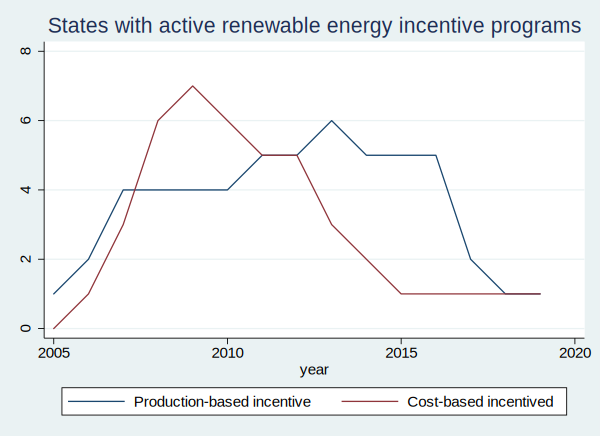

In [169]:
capture restore
capture preserve
collapse (sum) ptc_introduced ptc_expired itc_introduced itc_expired, by(year)
gen cum_ptc = sum(ptc_introduced - ptc_expired )
gen cum_itc = sum(itc_introduced - itc_expired)
label variable cum_ptc "Production-based incentive"
label variable cum_itc "Cost-based incentived"

twoway line cum_ptc year || line cum_itc year, title("States with active renewable energy incentive programs")

restore

## Event study with market creation variables







(90 real changes made)


(15 real changes made)

(28 real changes made)


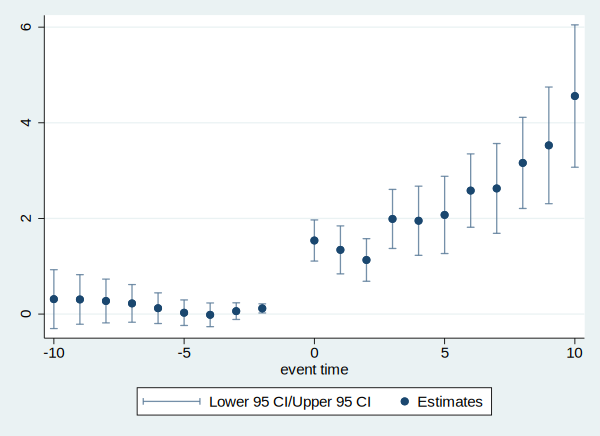

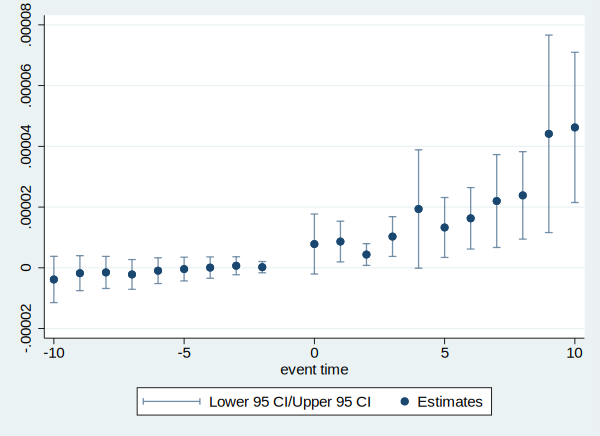

In [206]:
// repeat for first_plant_year and first_ipp_plant_eyar

capture restore
capture preserve
capture drop max_plant

bysort state: egen max_plant = max(any_plant)

gen dif = year - first_plant_yr 
replace dif = 0 if max_plant == 0 

local bw = 10
replace dif = -1 * `bw' if dif < -1 * `bw'
replace dif = `bw' if dif > `bw'

esplot log_ac_cap dif, absorb(year state_code) vce(cluster state_code)
graph display

esplot log_dc_per_cap dif, absorb(year state_code) vce(cluster state_code)
graph display

// esplot ac_cap_added dif, absorb(year state_code) vce(cluster state_code)
// graph display

// esplot dc_per_cap dif, absorb(year state_code) vce(cluster state_code)
// graph display

## Event study with solar carve-out and RPS







(510 real changes made)


(2 real changes made)

(14 real changes made)


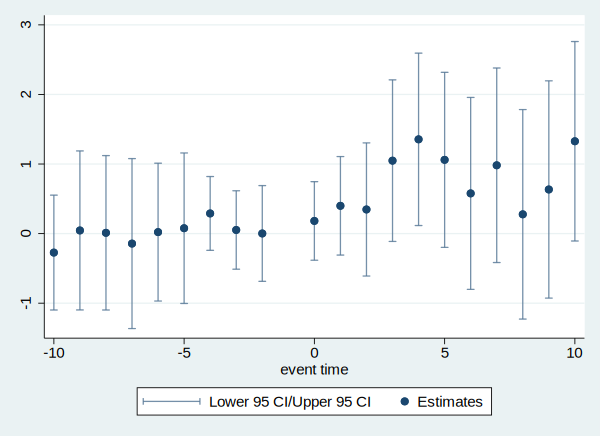

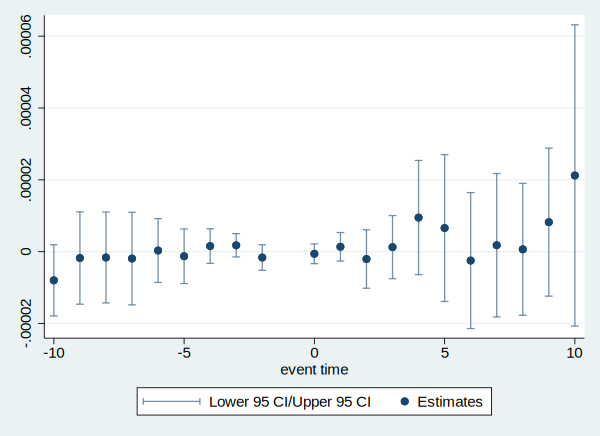

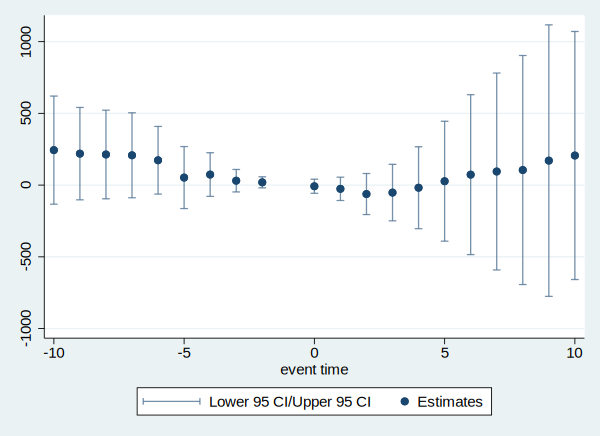

In [203]:
capture restore
capture preserve
capture drop max_carveout

bysort state: egen max_carveout = max(active_solar_rps)

gen dif = year - first_carveout_year
replace dif = 0 if max_carveout == 0 

local bw = 10
replace dif = -1 * `bw' if dif < -1 * `bw'
replace dif = `bw' if dif > `bw'

esplot log_ac_cap dif, absorb(year state_code) vce(cluster state_code)
graph display

esplot log_dc_per_cap dif, absorb(year state_code) vce(cluster state_code)
graph display

esplot cum_ac_cap_added dif, absorb(year state_code) vce(cluster state_code)
graph display

// esplot ac_cap_added dif, absorb(year state_code) vce(cluster state_code)
// graph display

// esplot dc_per_cap dif, absorb(year state_code) vce(cluster state_code)
// graph display







(510 real changes made)


(2 real changes made)

(14 real changes made)


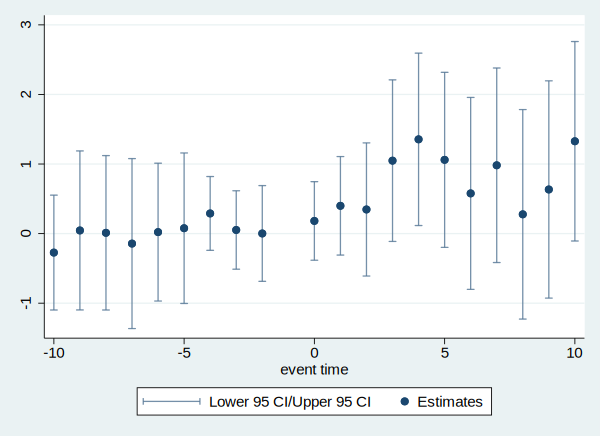

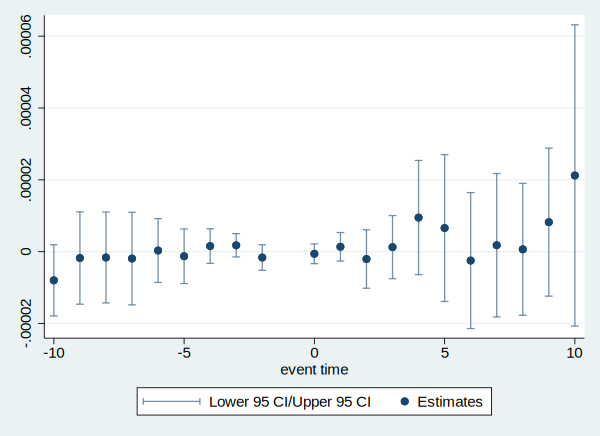

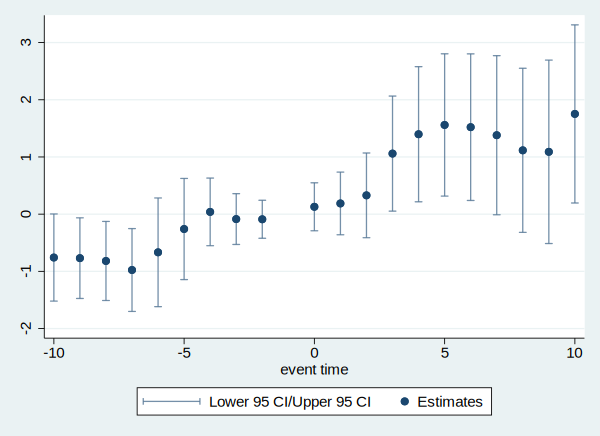

In [208]:
capture restore
capture preserve
capture drop max_carveout

bysort state: egen max_carveout = max(active_solar_rps)

gen dif = year - first_carveout_year
replace dif = 0 if max_carveout == 0 

local bw = 10
replace dif = -1 * `bw' if dif < -1 * `bw'
replace dif = `bw' if dif > `bw'

esplot log_ac_cap dif, absorb(year state_code) vce(cluster state_code)
graph display

esplot n_plants dif, absorb(year state_code) vce(cluster state_code)
graph display

// esplot log_cum_ac_cap dif, absorb(year state_code) vce(cluster state_code)
// graph display







(315 real changes made)


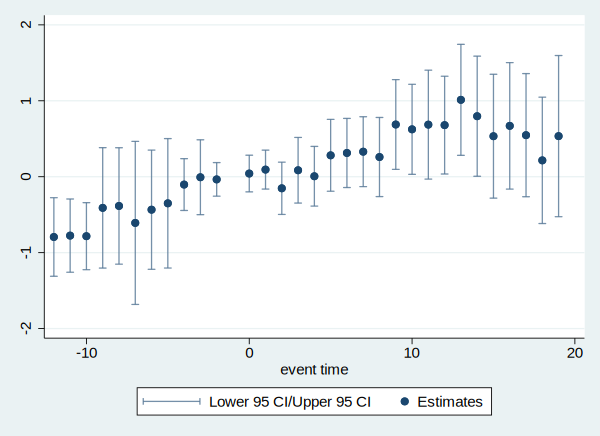

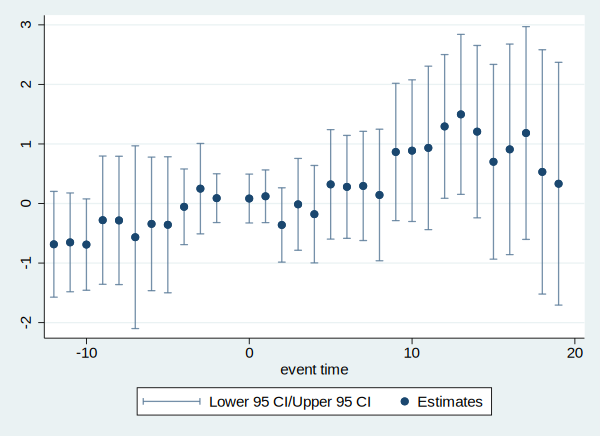

In [213]:
capture restore
capture preserve
capture drop max_rps

bysort state: egen max_rps = max(active_rps)

gen dif = year - first_rps_year
replace dif = 0 if max_rps == 0 

local bw = 10
// replace dif = -1 * `bw' if dif < -1 * `bw'
// replace dif = `bw' if dif > `bw'

esplot log_n_plants dif, absorb(year state_code) vce(cluster state_code)
graph display

esplot log_ac_cap dif, absorb(year state_code) vce(cluster state_code)
graph display

// esplot ac_cap_added dif, absorb(year state_code) vce(cluster state_code)
// graph display

// esplot dc_per_cap dif, absorb(year state_code) vce(cluster state_code)
// graph display

## Market expansion







(113 real changes made)

(99 real changes made)


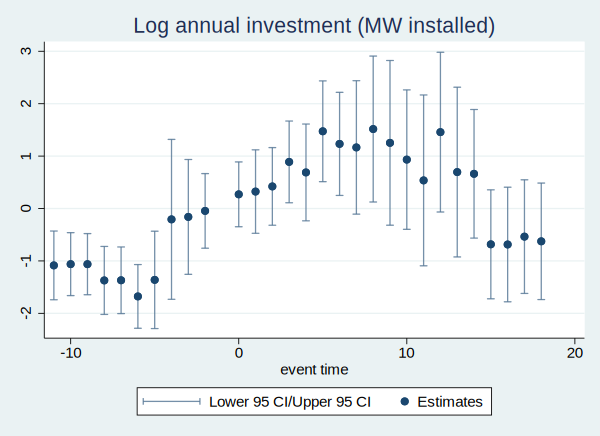

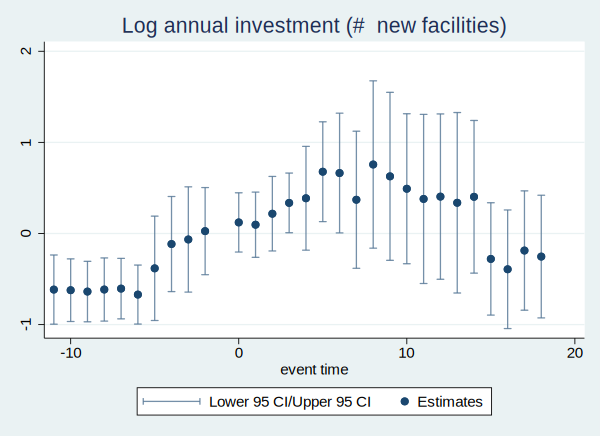

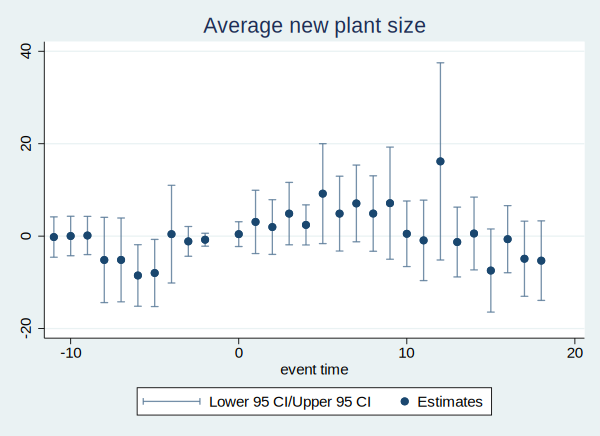

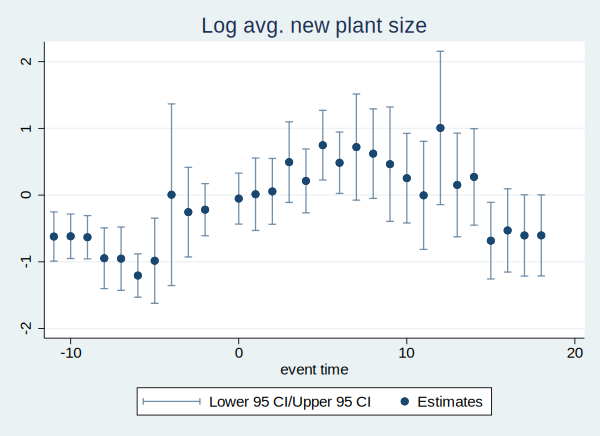

In [292]:
capture restore
capture preserve

bysort state: egen any_itc = max(itc_introduced)
bysort state: egen any_ptc = max(ptc_introduced)

gen dif = 0 
replace dif = year - itc_start_yr if any_itc != 0 
replace dif = year - ptc_start_yr if any_ptc != 0 

esplot log_ac_cap dif, absorb(year state_code) vce(cluster state_code) title("Log annual investment (MW installed)")
graph display

esplot log_n_plants dif, absorb(year state_code) vce(cluster state_code) title("Log annual investment (#  new facilities)")
graph display

esplot avg_cap_ac dif, absorb(year state_code) vce(cluster state_code) title("Average new plant size")
graph display

esplot log_avg_cap dif, absorb(year state_code) vce(cluster state_code) title("Log avg. new plant size")
graph display







(113 real changes made, 15 to missing)

(100 real changes made)


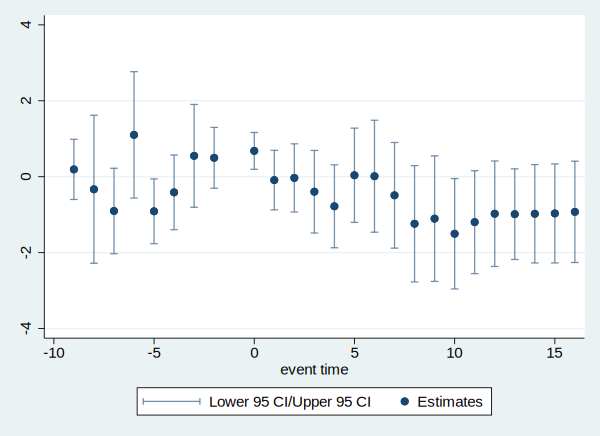

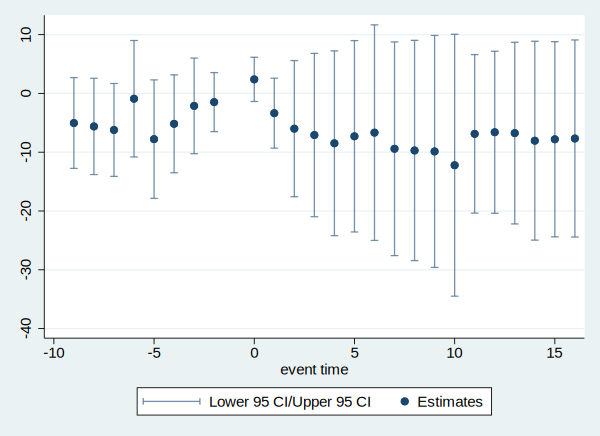

In [286]:
// capture restore
// capture preserve

// bysort state: egen any_itc = max(itc_introduced)
// bysort state: egen any_ptc = max(ptc_introduced)

// gen dif = 0 
// replace dif = itc_end_yr - year  if any_itc != 0 
// replace dif = ptc_end_yr - year if any_ptc != 0 

// esplot log_ac_cap dif, absorb(year state_code) vce(cluster state_code)
// graph display

// esplot n_plants dif, absorb(year state_code) vce(cluster state_code)
// graph display

In [314]:
// drop any_qf
// drop dif
bysort state: egen any_qf = max(first_qf_year > 2000)

gen dif = 0 
replace dif = year - first_qf_year if any_qf != 0 


variable any_qf already defined


r(110);
r(110);


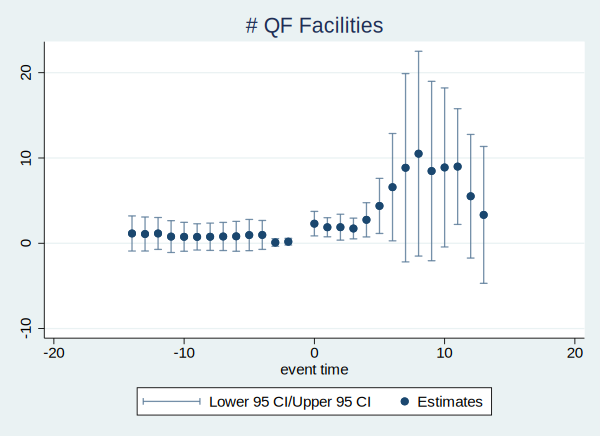

In [318]:
esplot n_plants_qf dif, absorb(year state_code) vce(cluster state_code) title("# QF Facilities")
graph display